In [1]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [94]:
#mode_name = feed_mode + '_' + str(softmax_temperature) + '_' + reinforce_strategy + '_' + attention_mode

mode_names = [
    'sampling__none_fixed',
    'sampling__direct_fixed',
    'sampling__argmax_advantage_fixed',
    'soft-gumbel_1.0__fixed'
]

names = ['train_losses', 'eval_losses', 'eval_f1s']

infixes = ['', '_noisy']

suffixes = ['_mean', '_std']

In [95]:
import pickle

data = {}
for mode_name in mode_names:
    data[mode_name] = {}
    for name in names:
        for infix in infixes:
            if name == 'train_losses' and infix == '_noisy':
                continue
            data[mode_name][name + infix] = {}
            for suffix in suffixes:
                with open(mode_name + '/' + name + infix + suffix + '.dat', 'rb') as f:
                    data[mode_name][name + infix][suffix] = pickle.load(f)

In [66]:
def exp_running_average(a, alpha=0.95):
    av = np.zeros_like(a)
    av[0] = a[0]
    for i in range(1, len(a)):
        av[i] = alpha * av[i - 1] + (1 - alpha) * a[i]
    return av

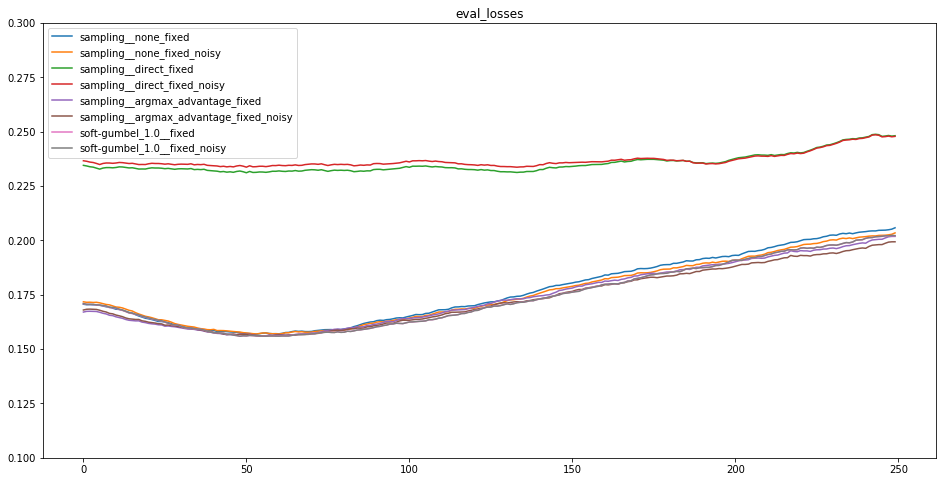

In [115]:
plt.figure(figsize=(16, 8))

name = 'eval_losses'
for mode_name in mode_names:
    for infix in infixes:
        plt.plot(exp_running_average(data[mode_name][name + infix]['_mean'][50:]))
        #plt.fill_between(
        #    range(len(data[mode_name][name + infix]['_mean'])),
        #    exp_running_average(data[mode_name][name + infix]['_mean'] - data[mode_name][name + infix]['_std']),
        #    exp_running_average(data[mode_name][name + infix]['_mean'] + data[mode_name][name + infix]['_std']),
        #    alpha=0.5
        #)
plt.ylim(0.1, 0.3)
plt.legend([mode_name + infix for mode_name in mode_names for infix in infixes])
plt.title('eval_losses')

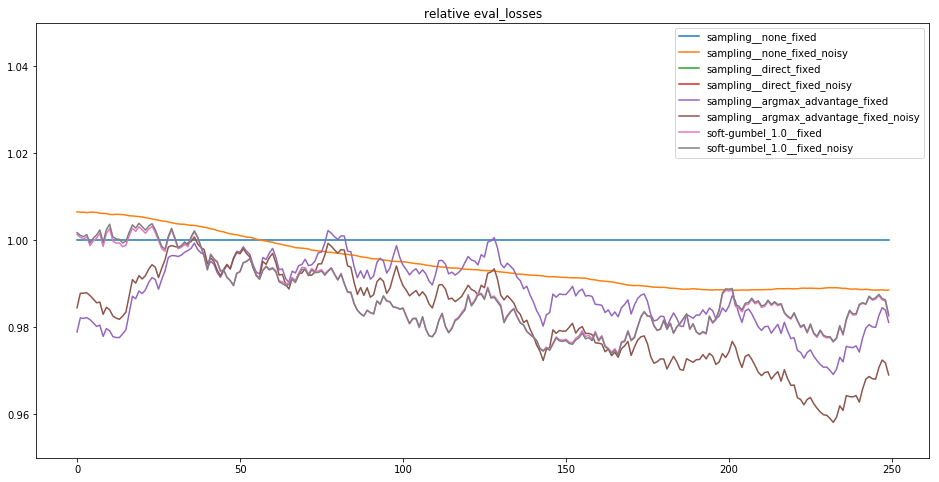

In [116]:
plt.figure(figsize=(16, 8))

name = 'eval_losses'
for mode_name in mode_names:
    for infix in infixes:
        plt.plot(
            exp_running_average(
                (data[mode_name][name + infix]['_mean'] / (data['sampling__none_fixed'][name]['_mean'] + 1e-20))[50:],
            )
        )
        #plt.fill_between(
        #    range(250),
        #    exp_running_average(
        #        ((data[mode_name][name + infix]['_mean'] - data[mode_name][name + infix]['_std']) / (data['sampling__none_fixed'][name]['_mean'] + 1e-20))[50:]
        #    ),
        #    exp_running_average(
        #        ((data[mode_name][name + infix]['_mean'] + data[mode_name][name + infix]['_std']) / (data['sampling__none_fixed'][name]['_mean'] + 1e-20))[50:]
        #    ),
        #    alpha=0.5
        #)
plt.legend([mode_name + infix for mode_name in mode_names for infix in infixes])
plt.ylim(0.95, 1.05)
plt.title('relative eval_losses')

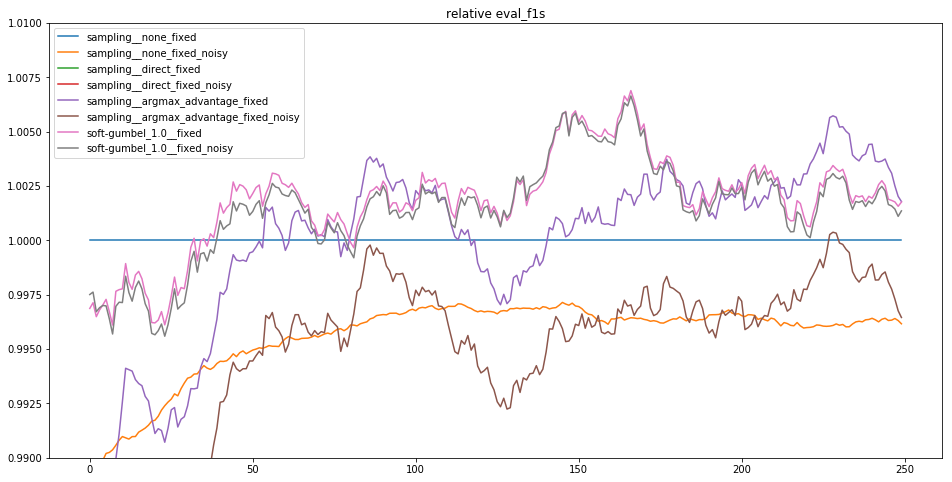

In [117]:
plt.figure(figsize=(16, 8))

name = 'eval_f1s'
for mode_name in mode_names:
    for infix in infixes:
        plt.plot(
            exp_running_average(
                (data[mode_name][name + infix]['_mean'] / (data['sampling__none_fixed'][name]['_mean'] + 1e-20))[50:],
            )
        )
        #plt.fill_between(
        #    range(250),
        #    exp_running_average(
        #        ((data[mode_name][name + infix]['_mean'] - data[mode_name][name + infix]['_std']) / (data['sampling__none_fixed'][name]['_mean'] + 1e-20))[50:]
        #    ),
        #    exp_running_average(
        #        ((data[mode_name][name + infix]['_mean'] + data[mode_name][name + infix]['_std']) / (data['sampling__none_fixed'][name]['_mean'] + 1e-20))[50:]
        #    ),
        #    alpha=0.5
        #)
plt.legend([mode_name + infix for mode_name in mode_names for infix in infixes])
plt.ylim(0.99, 1.01)
plt.title('relative eval_f1s')

In [84]:
np.argmin(exp_running_average(data['sampling__none_fixed']['eval_losses']['_mean'][50:]))

53

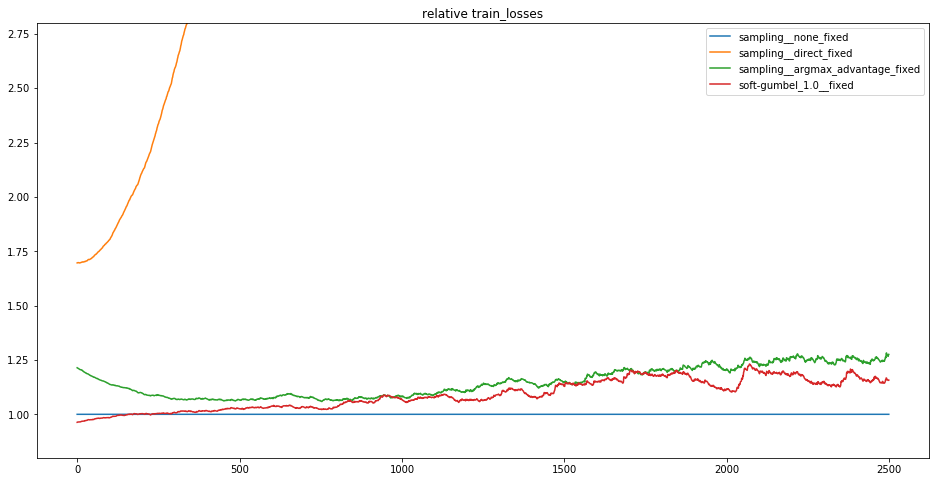

In [118]:
plt.figure(figsize=(16, 8))

name = 'train_losses'
for mode_name in mode_names:
    for infix in ['']:
        plt.plot(
            exp_running_average(
                (data[mode_name][name + infix]['_mean'] / (data['sampling__none_fixed'][name]['_mean'] + 1e-20))[500:],
                alpha=0.995
            )
        )
        #plt.fill_between(
        #    range(250),
        #    exp_running_average(
        #        ((data[mode_name][name + infix]['_mean'] - data[mode_name][name + infix]['_std']) / (data['sampling__none_fixed'][name]['_mean'] + 1e-20))[50:]
        #    ),
        #    exp_running_average(
        #        ((data[mode_name][name + infix]['_mean'] + data[mode_name][name + infix]['_std']) / (data['sampling__none_fixed'][name]['_mean'] + 1e-20))[50:]
        #    ),
        #    alpha=0.5
        #)
plt.legend([mode_name for mode_name in mode_names])
plt.ylim(0.8, 2.8)
plt.title('relative train_losses')